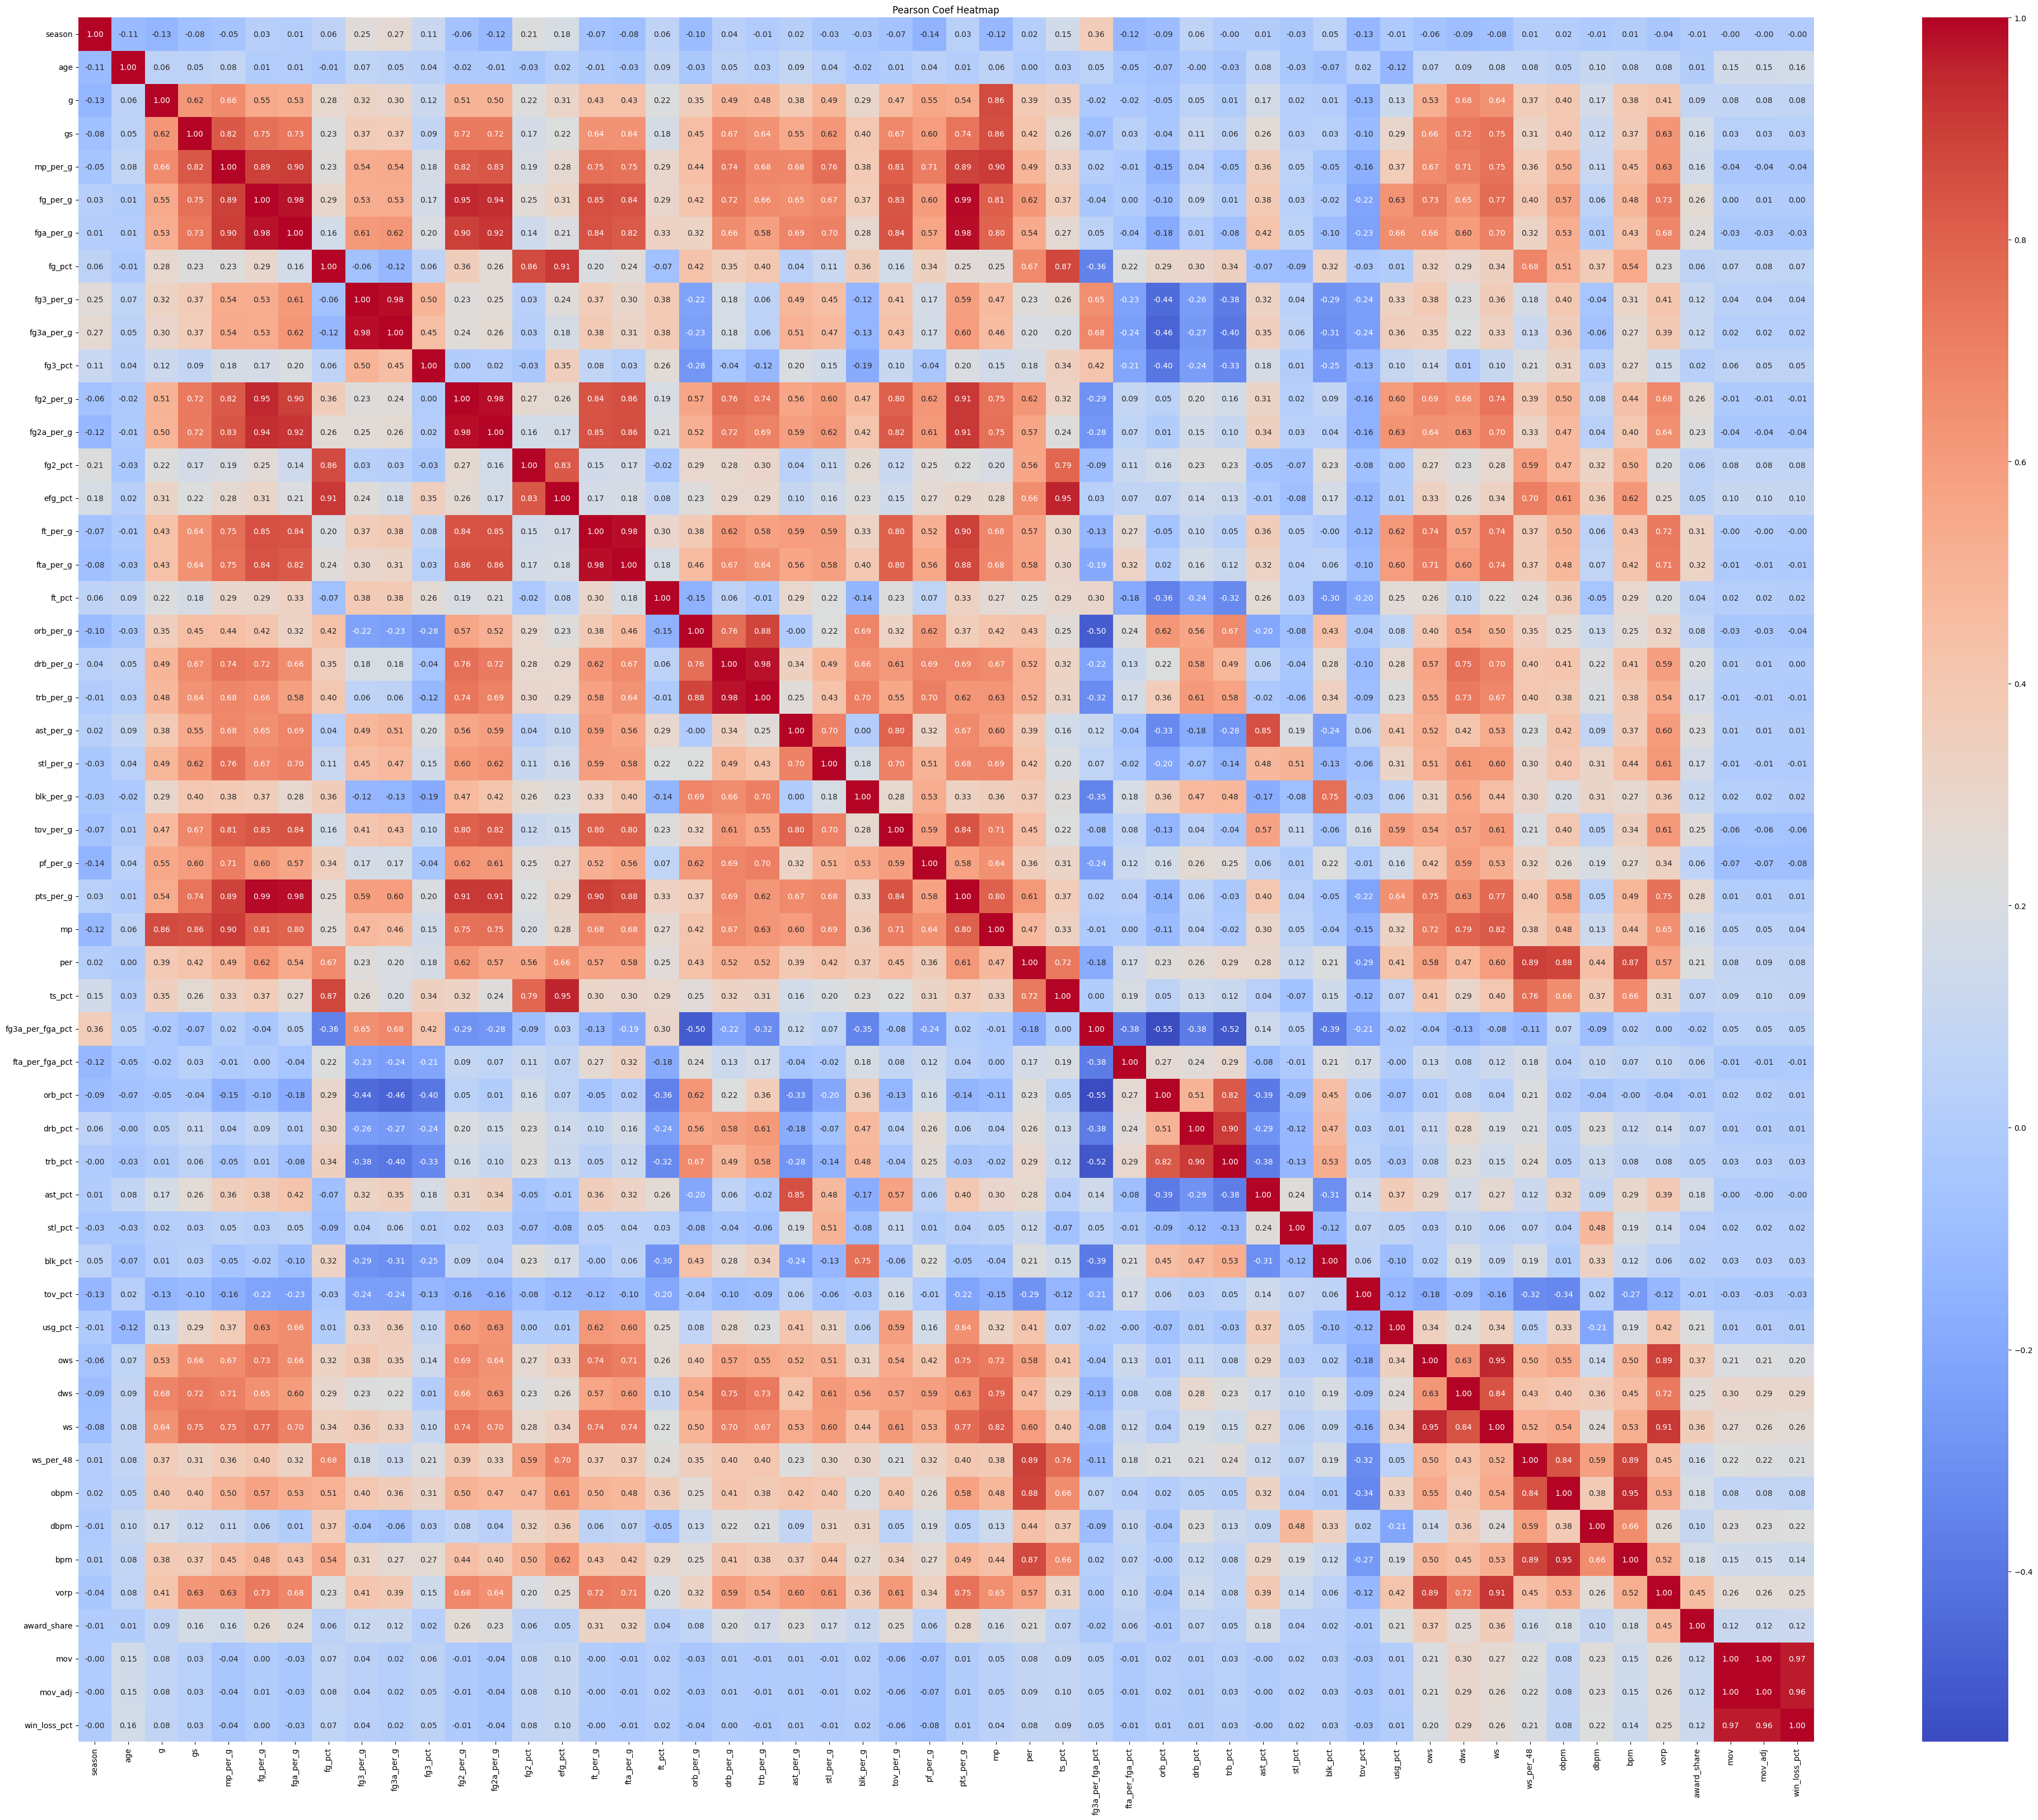

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

csv = '../data/raw/NBA_dataset.csv'

df = pd.read_csv(csv)

tenYears = df.loc[df['season'] > 2000]

numeric_df = tenYears.select_dtypes(include=[float, int])

num_correlation = numeric_df.corr(method="pearson")

plt.figure(figsize=(50, 40))
sns.heatmap(num_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Coef Heatmap")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

target = 'award_share'

selected_features = ['vorp', 'per', 'ws', 'ows', 'dws', 'pts_per_g', 'fg_per_g'] 

X = numeric_df[selected_features]
y = numeric_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Init Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# Fit
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

# Predict on test set
y_pred_rf = best_rf.predict(X_test)

# Eval
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R² Score (Random Forest): {r2_rf}')


Mean Squared Error (Random Forest): 0.001416050797433353
R² Score (Random Forest): 0.6094510287768571
